In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import normalize
import gc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

#df5= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/short_movies.csv')
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modified MatrixFactorization.csv',dtype=np.float32,converters={'Index':np.uint16},index_col=[0])
#df.to_csv()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Both a converter and dtype were specified for column Index - only the converter will be used
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:

df=df.sort_index()

# **DATASET**

**row column reduction`**`



In [4]:
#print(df.index)

# df.drop(df[df['Index']%291==0].index,inplace=True)
# df.drop(columns=[(s)  for s in df.columns.to_list() if s.isdigit() and not int(s)==0 and  int(s)%291==0],inplace=True)
# df.shape


 **Remove *NaN* Value**

In [3]:
#from sklearn.impute import SimpleImputer
df1=df
df1=df1.fillna(df1.mean())
#df1=SimpleImputer(missing_values=np.nan,strategy='median')
#df1.head()
# temp=df1.fit_transform(df)
# df1=pd.DataFrame(temp,index=df.index,columns=df.columns)

In [ ]:
#df1.head(10)

In [ ]:
#df.head(10)

# **Implementation**

**Normalize User Matrix U**

In [4]:
def normalize_UserMatrix(n,k):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  np.random.seed(10)
  #U_matrix= (np.random.rand(n, k))# randomly initialize User Matrix
  user_matrix= np.single(np.random.rand(n, k))# randomly initialize User Matrix
  user_matrix = normalize(user_matrix, norm='l2')
  '''scaler.fit_transform(user_matrix)'''
  print("shape: ",user_matrix.shape)
  return user_matrix

# **Dimension Of U & V matrix**

In [ ]:
#lamda_V*np.identity(latent_Factor,dtype=float)

In [ ]:
# V_matrix= np.single(np.dot(np.linalg.inv(np.dot(U_matrix.T,U_matrix)+lamda_V*np.identity(latent_Factor)),(np.dot(df1.T,U_matrix)).T))
# print(V_matrix.shape)
# V_matrix

In [ ]:
# U_matrix=np.single((np.dot(np.linalg.inv(np.dot(V_matrix,V_matrix.T)+lamda_U*np.identity(latent_Factor)),(np.dot(df1,V_matrix.T)).T)).T)
# print(U_matrix.shape)

In [ ]:
#np.dot(U_matrix,V_matrix)

# **Matrix Factorization Procedure**

In [5]:
def error_calculation(new_matrix):
  mse2= (np.square(np.abs(df1-new_matrix)))
  #print(mse2)
  listV=mse2.to_numpy()
  #print('\n',listV)
  sumnan=np.nansum(listV)
  #print(sumnan)
  temp=sum(df1.count())
  #print(temp)
  return((sumnan/temp))
#print(sum(np.sum(mse2/17,axis=1)))

#print((np.square(df5 - new_matrix)).mean(axis=None))


In [6]:
def Matrix_factorization(k,n,lamda_u,lamda_v):

  for i in k:
    min_mase=float('inf')
    count=0
    loop=500
    X_axis=[]
    iteration=[]
    U_matrix=normalize_UserMatrix(n,i)
    print("\t\tK :",i)
    for j in range(loop):
      iteration.append(j)
      #print(U_matrix)
      print(":::::Iteration::::",j+1)
      V_matrix= np.single(np.dot(np.linalg.inv(np.dot(U_matrix.T,U_matrix)+lamda_V*np.identity(i)),(np.dot(df1.T,U_matrix)).T))
      U_matrix= np.single((np.dot(np.linalg.inv(np.dot(V_matrix,V_matrix.T)+lamda_U*np.identity(i)),(np.dot(df1,V_matrix.T)).T)).T)
      new_matrix= np.dot(U_matrix,V_matrix)
      meanSquareError= error_calculation(new_matrix)
      Y_axis=[j]
      if meanSquareError<min_mase:
        print(meanSquareError,':::',min_mase)
        min_mase=meanSquareError
        X_axis.append(min_mase)
        Usr_matrix=U_matrix
        movie_matrix=V_matrix
      elif meanSquareError>=min_mase:
        count=1
        print("\n\n::::::::::::elseeeeee:::::::::::")
        print(meanSquareError,':::',min_mase)
        X_axis.append(meanSquareError)
        plt.plot(np.array(iteration).reshape(j+1,1),np.array(X_axis).reshape(j+1,1),linestyle='--' ,label="K="+str(i))
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.legend()
        plt.grid(color = 'green', linestyle = 'solid', linewidth = 0.5)
        plt.show()
        break
    
    if count==0:
      plt.plot(np.array(iteration).reshape(j+1,1),np.array(X_axis).reshape(j+1,1),linestyle='--' ,label="K="+str(i))
      plt.legend()
      plt.grid(color = 'green', linestyle = 'solid', linewidth = 0.5)
      plt.show()

  return X_axis,Usr_matrix,movie_matrix,new_matrix
  

# **Main Calling Function**

shape:  (44799, 700)
		K : 700
:::::Iteration:::: 1
5.140359244552457 ::: inf
:::::Iteration:::: 2
5.002495867640964 ::: 5.140359244552457
:::::Iteration:::: 3
4.914926903850726 ::: 5.002495867640964
:::::Iteration:::: 4
4.862029551379224 ::: 4.914926903850726
:::::Iteration:::: 5
4.828858289225107 ::: 4.862029551379224
:::::Iteration:::: 6
4.806963752410425 ::: 4.828858289225107
:::::Iteration:::: 7
4.791835996956218 ::: 4.806963752410425
:::::Iteration:::: 8
4.780974536582584 ::: 4.791835996956218
:::::Iteration:::: 9
4.772976883461005 ::: 4.780974536582584
:::::Iteration:::: 10
4.766940761812297 ::: 4.772976883461005
:::::Iteration:::: 11
4.762266376350682 ::: 4.766940761812297
:::::Iteration:::: 12
4.75861020795794 ::: 4.762266376350682
:::::Iteration:::: 13
4.755662601555911 ::: 4.75861020795794
:::::Iteration:::: 14
4.753329713575958 ::: 4.755662601555911
:::::Iteration:::: 15
4.751370477970209 ::: 4.753329713575958
:::::Iteration:::: 16
4.749775424286782 ::: 4.751370477970209
::

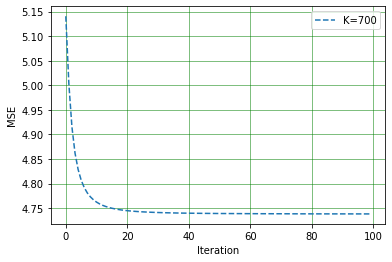

In [7]:
latent_Factor=[700]
k=latent_Factor
N=df1.shape[0]

group_id=226
lamda_U=(0.00015 + 0.0001*(group_id % 8))
lamda_V=(0.00025 + 0.0001*(group_id % 7))
X_axis,u_matrix,v_matrix,new_M=Matrix_factorization(k,N,lamda_U,lamda_V)




In [9]:
  var=df.index.tolist()

In [8]:
#recommanded_Movie=recommanded(df,generated_matrix)


def recommanded(df,generated_matrix):
  import math as m

  usr=int(input("User ID: "))
  if(usr in var):
    main=df.iloc[usr-1]
    #print(main.index.tolist())
    List_index=main.index.to_list()
    for i in range(0, len(List_index)):
      List_index[i] = int(List_index[i])
    #print(List_index)
    orginalMatrix=list(zip(List_index,main))
    #print(orginalMatrix)
    suggestion=generated_matrix.iloc[usr-1]
    List_index_new_matrix=generated_matrix.index.to_list()
    generated = list(zip(List_index_new_matrix,suggestion))
    #print(List_index_new_matrix)
    mixed=list(zip(orginalMatrix,generated))

    suggeted_movie_index=[]
    suggeted_movie_ratings=[]
    for i in range (len(List_index)):

      if m.isnan(orginalMatrix[i][1]):

        suggeted_movie_index.append(generated[i-1][0])
        suggeted_movie_ratings.append(generated[i][1])
        #print("hello nan")
        #print(mixed[i][0])
    #suggeted_movie_ratings.sort(reverse=True)
    print("Top 5 Movies (movie ID, Predicted Rating) :")
    N=5
    movie_with_Index=list(zip(suggeted_movie_index,suggeted_movie_ratings))
    res = sorted(movie_with_Index, key = lambda x: x[1], reverse = True)[:N]
    print(res)
    # for j in list(zip(suggeted_movie_index,suggeted_movie_ratings)):
    #   print()
  else:
    print("Unknown User")    


In [10]:
def cosine_similarity_user(u_matrix):
  v = cosine_similarity(u_matrix.T)
  plt.figure(figsize = (15,10))
  sns.heatmap(v,annot=True)
def cosine_similarity_movie(v_matrix):
  a=  cosine_similarity(v_matrix)
  plt.figure(figsize = (15,10))
  sns.heatmap(a,annot=True)





In [ ]:
generated_matrix=pd.DataFrame(new_M,index=df1.index)
generated_matrix=generated_matrix.sort_index()
recommanded(df,generated_matrix)
cosine_similarity_user(u_matrix)


User ID: 5
Top 5 Movies (movie ID, Predicted Rating) :
[(1269, 9.031595230102539), (4865, 8.25700569152832), (4268, 8.242325782775879), (2708, 8.17665958404541), (1735, 8.11241340637207)]


In [ ]:
cosine_similarity_movie(v_matrix)

In [ ]:
df